# Regresja liniowa

Regresja liniowa jest najprostszym wariantem regresji (przeczytaj najpierw o idei regresji) w statystyce. Zakłada ona, że zależność pomiędzy zmienną objaśnianą a objaśniająca jest zależnością liniową. W regresji liniowej zakłada się, że wzrostowi jednej zmiennej (predyktor, predyktory) towarzyszy wzrost lub spadek na drugiej zmiennej. Co więcej, nazwa regresji liniowej odnosi się, że funkcja regresji przyjmuje postać funkcji liniowej, czyli <b> y = bx+a</b>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<img src="data//Regresja.png" style="width: 400px;">

<font size="3">Analiza regresji liniowej ma na celu wyliczenie takich współczynników regresji (współczynników w modelu liniowym), aby model jak najlepiej przewidywał wartość zmiennej zależnej, aby błąd oszacowania był jak najmniejszy. Tak więc analiza regresji "dopasowuje" taką linię prostą do badanych (liniowa zależność), aby jak model był jak najlepszy (obarczony jak najmniejszym błędem losowym).</font>

<font size="3">Czyli musimy stworzyć taką funkcję h: X -> Y, która będzie "dobrze" przewidziać wartości zmiennej zależnej. W tym celu musimy znaleźć współczynniki a i b, które będą odpowiadały za wzrost lub spadek wartości zmiennej zależnej.<b> Warto nadmienić, że zmienna objaśniana za pomocą modelu musi mieć charakter ciągły.</b></font>

<center><font size="20"><b>h<sub>θ</sub>(x) = θ<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub></b></font></center>


θi - współczynnik(waga) $i$ <br>
xi - wartość zmiennej $i$

<center><img src="data//Capture.jpg" style="width: 300px;"></center>

Teraz wystarczy tylko zbudować funkcję, która określa, dla każdej wartości θ, jak blisko są h(x(i)) do odpowiadających y(i). 

<center><img src="data//Capture2.jpg" style="width: 300px;"></center>

<center><img src="data//Capture3.jpg" style="width: 300px;"></center>

In [2]:
df = pd.read_table("data//ex2.txt",sep=',',names=['x1','x2','y'])
df.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


(array([ 1.,  0.,  6.,  0.,  0., 25.,  0., 14.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

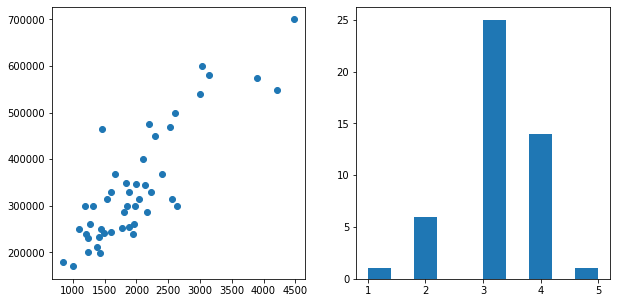

In [3]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(df['x1'],df['y'])
ax2.hist(df['x2'])

In [4]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# fig = plt.figure(figsize=(9, 6))
# ax = Axes3D(fig)
# ax.plot_trisurf(df.x1,  df.x2,df.y,  linewidth=0.2)
# ax.set_xlabel('Powierzchnia')
# ax.set_ylabel('Ilość łazienek')
# ax.set_zlabel('Cena')


Model regresji linowej jednej zmiennej. 

In [5]:
from sklearn.linear_model import LinearRegression
# dopasowuje dane do modelu
model_ov = LinearRegression().fit(df['x1'].values.reshape(-1,1),df['y'])
# wylicza wartości przewidywane
predictions_ov = model_ov.predict(df['x1'].values.reshape(-1,1))
# zwraca R^2 
model_ov.score(df['x1'].values.reshape(-1,1),df['y'])
model_ov.coef_

array([134.52528772])

I dwóch zmiennych

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df[['x1','x2']],df['y'])
predictions = model.predict(df[['x1','x2']])
model.score(df[['x1','x2']],df['y'])
model.coef_

array([  139.21067402, -8738.01911233])

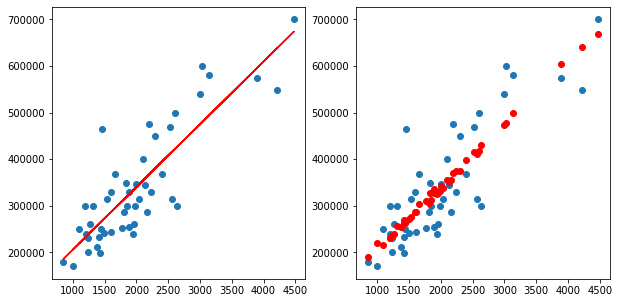

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(df['x1'],df['y'])
ax1.plot(df['x1'],predictions_ov,color='red')

ax2.scatter(df['x1'],df['y'])
ax2.scatter(df['x1'],predictions,color='red')

# Boston Housing Dataset

In [8]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()
print (data.DESCR)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

# Wybierzmy zmienną wyjaśnianą
target = pd.DataFrame(data.target, columns=["MEDV"])

<font size=3><ul> 
<li>Regresję liniową najlepiej stosować do uchwycenia relacji między zmiennymi wejściowymi a danymi wyjściowymi.</li> 
<li>Zawsze możesz przekształcić swoje dane, aby zachować liniową relację.</li> 
<li>Na przykład, jeśli dane mają relację wykładniczą, można zastosować transformację logarytmiczną, aby relacja była liniowa.</li>
</ul></font>

In [ ]:
#  RM       average number of rooms per dwelling
X = df["RM"]
# MEDV     Median value of owner-occupied homes in $1000's
y = target["MEDV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        15:23:42   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS - (ang. Ordinary least squares) Metoda najmniejszych kwadratów <br>
R-Squared -  "jaki procent jednej zmiennej wyjaśnia zmienność drugiej zmiennej". Przyjmuje on wartości od 0 do 1. 
coef - oznacza, że ​​jeśli zmienna RM wzrośnie o 1, przewidywana wartość MEDV wzrośnie o 3,634.

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           2.49e-74
Time:                        15:23:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:23:42   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<li>Model ten wychwytuje 94,8% wariancji zmiennej zależnej
<li>Gdy RM wzrośnie o 1, MEDV wzrośnie o 4,9069
<li>Gdy LSTAT wzrośnie o 1, MEDV zmniejszy się o 0,6557.
<br><br>
<li>Domy z niewielką liczbą pokoi mają prawdopodobnie niską wartość cenową.
<li>Na obszarach, gdzie stan ludności jest niższy, ceny domów prawdopodobnie będą niskie.

# Linear Regression with Scikit-Learn

<table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%" />
<col style="width: 90%" />
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="#sklearn.linear_model.LinearRegression.fit" title="sklearn.linear_model.LinearRegression.fit"><code class="xref py py-obj docutils literal notranslate"><span class="pre">fit</span></code></a>(X, y[, sample_weight])</p></td>
<td><p>Fit linear model.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="#sklearn.linear_model.LinearRegression.get_params" title="sklearn.linear_model.LinearRegression.get_params"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_params</span></code></a>([deep])</p></td>
<td><p>Get parameters for this estimator.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#sklearn.linear_model.LinearRegression.predict" title="sklearn.linear_model.LinearRegression.predict"><code class="xref py py-obj docutils literal notranslate"><span class="pre">predict</span></code></a>(X)</p></td>
<td><p>Predict using the linear model.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="#sklearn.linear_model.LinearRegression.score" title="sklearn.linear_model.LinearRegression.score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">score</span></code></a>(X, y[, sample_weight])</p></td>
<td><p>Return the coefficient of determination of the prediction.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#sklearn.linear_model.LinearRegression.set_params" title="sklearn.linear_model.LinearRegression.set_params"><code class="xref py py-obj docutils literal notranslate"><span class="pre">set_params</span></code></a>(**params)</p></td>
<td><p>Set the parameters of this estimator.</p></td>
</tr>
</tbody>
</table>

# Czy LR jest zawsze użyteczna?

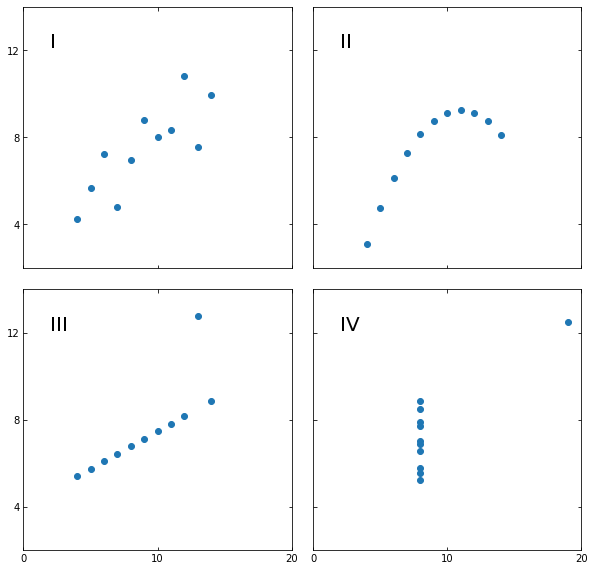

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    

plt.show()

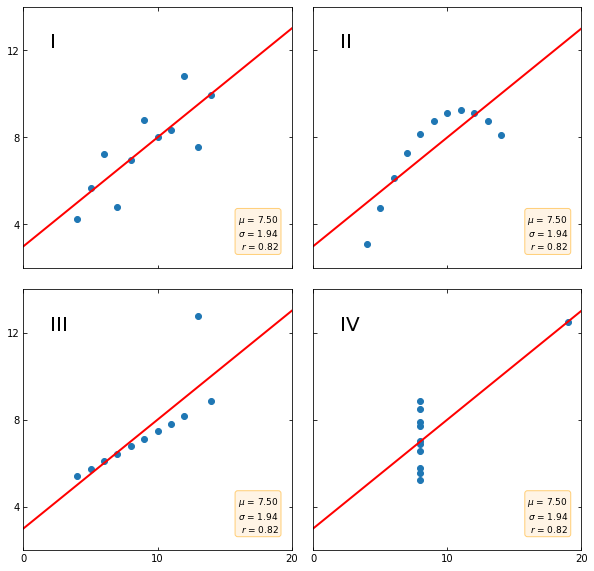

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()